<a href="https://colab.research.google.com/github/ihagoSantos/statistical_models/blob/main/models_comparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando de modelos
Comparando de modelos de regressão linear utilizando as métricas de avaliação de modelos

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importanto Dataset
## Contextualização
O conjunto de dados de diabetes usado neste exemplo é proveniente do sklearn.datasets. As variáveis presentes no conjunto de dados são:

- age: Idade do paciente
- sex: Gênero do paciente (0: feminino, 1: masculino)
- bmi: Índice de massa corporal (IMC)
- bp: Pressão arterial média
- s1: Total de soro de lipoproteína de alta densidade (HDL)
- s2: Total de soro de lipoproteína de baixa densidade (LDL)
- s3: Total de soro de total de triglicerídeos
- s4: Total de soro de total de lipoproteína
- s5: Total de soro de ácido sérico
- s6: Total de soro de lamotrigina.

Cada uma dessas variáveis representa diferentes características médicas e fisiológicas dos pacientes.

O Objetivo é prever a medida quantitativa da progressão da doença diabética após um ano com base nessas características.
O valor alvo (target) é uma medida quantitativa da progressão da doença.


In [6]:
from sklearn import datasets
data = datasets.load_diabetes()
X = data.data
Y = data.target
feature_names = data.feature_names

# Verificando os dados carregados

In [7]:
data.feature_names # nome das variáveis

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
data.data.shape # tamanho da base de dados

(442, 10)

In [9]:
data.target.shape # tamanho do alvo

(442,)

# Criando Dataframe para iniciar as análises

In [10]:
db_df = pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
db_df['progressao'] = data.target

In [14]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [15]:
db_df.isna().sum() # verificando se existe valores ausentes

age           0
sex           0
bmi           0
bp            0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
progressao    0
dtype: int64

# Análise Descritiva

In [16]:
pd.options.display.float_format = '{:.2f}'.format # formatando os valores floats para duas casas decimais

In [17]:
db_df.describe() # Análise Descritiva dos dados. Os dados já se encontram padronizados, variando entre 0 e 1.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [18]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    float64
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    float64
 10  progressao  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# Análise Gráfica

A análise gráfica é uma maneira eficaz de entender as relações de variáveis e identificar padrões dos dados.
O pairplot cria um conjunto de gráficos de dispersão entre todas as variáveis, além de exibir histogramas na diagonal. Isso permite visualizar rapidamente as relações entre as variáveis.

## Pairplot

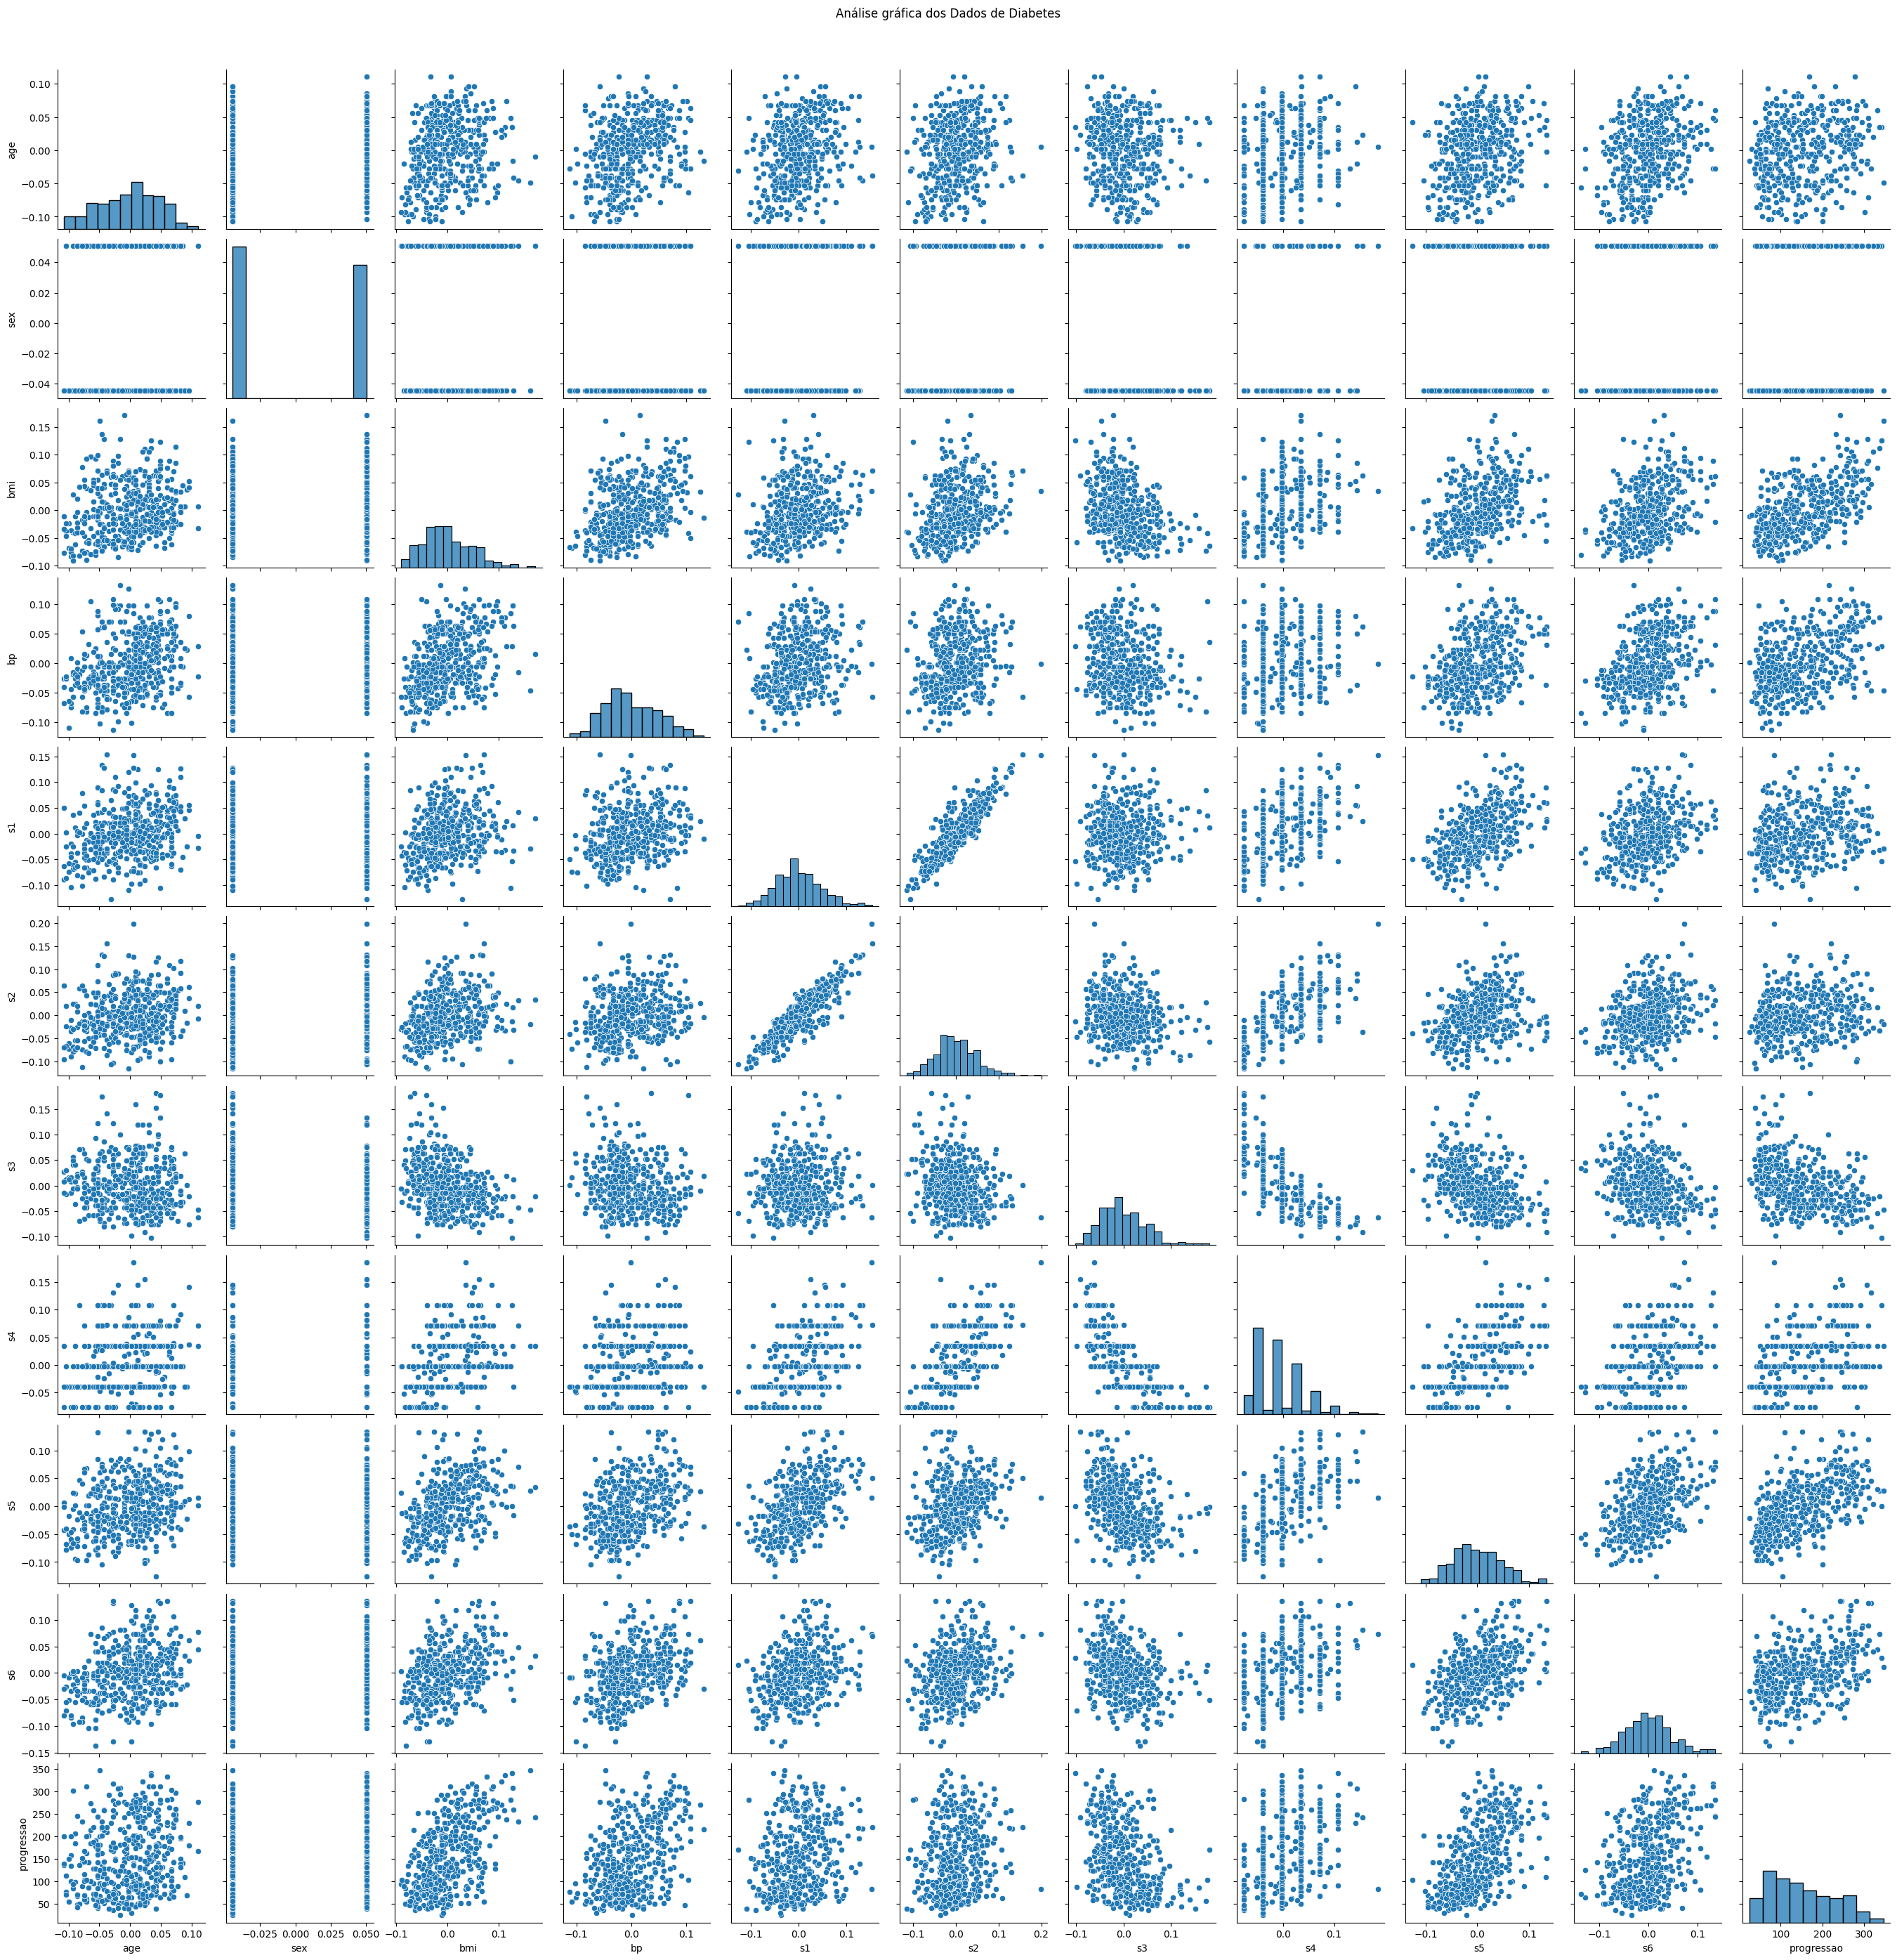

In [19]:
sns.pairplot(db_df)
plt.suptitle("Análise gráfica dos Dados de Diabetes", y=1.02)
plt.show()

## Matriz de Correlação

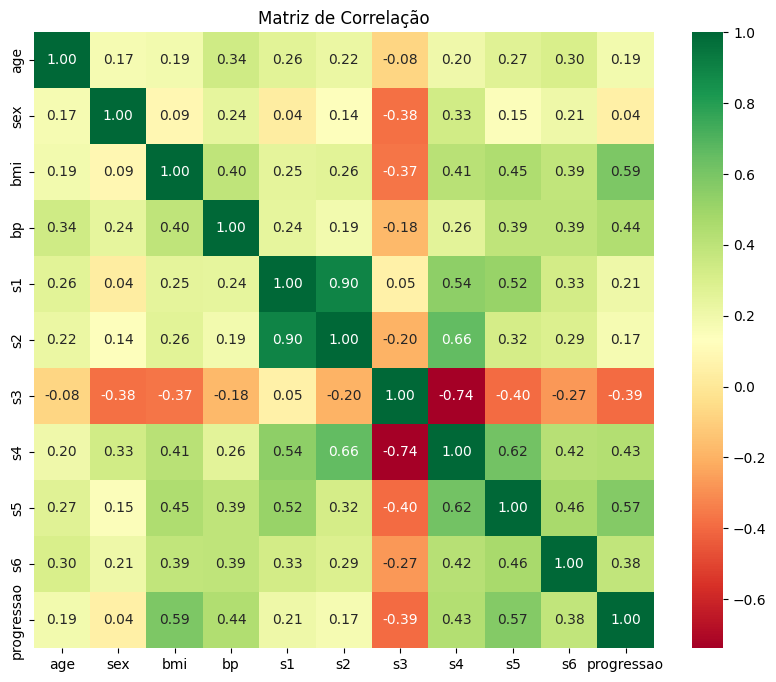

In [22]:
correlation_matrix = db_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Maiores correlações com a variável *progressao*:
1. bmi: 0.59
2. s5: 0.57
3. bp: 0.44
4. s4: 0.43
5. s3: 0.39

# Criando modelos baseado na correlação das variáveis

In [23]:
db_df.head(0) # para verificar o nome das variáveis

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao


In [24]:
results = []

# Regressão Linear simples com a variável mais correlacionada com nossa resposta

## Funções auxiliares

In [28]:
def print_summary(model_name, model):
  print("Análise do " + model_name)
  print(model.summary())
  print("=" * 80)

In [35]:
def get_quality_analisys(model_name, model, target):
  return {
      "Modelo": model_name,
      "MAE": np.mean(np.abs(target - model.predict())),
      "MSE": np.mean((target - model.predict()) ** 2),
      "AIC": model.aic,
      "BIC": model.bic,
      "R2": model.rsquared
  }

## Modelo 1

In [25]:
lm1 = sm.OLS.from_formula("progressao ~ bmi", data = db_df)

In [26]:
model_1 = lm1.fit()

In [29]:
print_summary("Modelo 1", model_1)

Análise do Modelo 1
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           3.47e-42
Time:                        20:02:57   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974

In [38]:
qa_model_1 = get_quality_analisys(model_name="Modelo 1", model=model_1, target=Y)
qa_model_1

{'Modelo': 'Modelo 1',
 'MAE': 51.798627639533656,
 'MSE': 3890.4565854612724,
 'AIC': 4912.038220667561,
 'BIC': 4920.220840431717,
 'R2': 0.3439237602253802}

In [37]:
results.append(qa_model_1)

[{'Modelo': 'Modelo 1',
  'MAE': 51.798627639533656,
  'MSE': 3890.4565854612724,
  'AIC': 4912.038220667561,
  'BIC': 4920.220840431717,
  'R2': 0.3439237602253802}]

## Modelo 2

In [39]:
lm2 = sm.OLS.from_formula("progressao ~ bmi+s5", data=db_df)
model_2 = lm2.fit()
print_summary("Modelo 2", model_2)

Análise do Modelo 2
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.25e-59
Time:                        20:12:27   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.702

In [40]:
qa_model_2 = get_quality_analisys(model_name="Modelo 2", model=model_2, target=Y)
qa_model_2

{'Modelo': 'Modelo 2',
 'MAE': 46.798391105248065,
 'MSE': 3205.1900768248533,
 'AIC': 4828.39845323345,
 'BIC': 4840.672382879683,
 'R2': 0.4594852796392662}

In [41]:
results.append(qa_model_2)

## Modelo 3

In [43]:
lm3 = sm.OLS.from_formula("progressao ~ bmi+s5+bp", data=db_df)
model_3 = lm3.fit()
print_summary("Modelo 3", model_3)

Análise do Modelo 3
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           7.16e-62
Time:                        20:14:49   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653

In [44]:
qa_model_3 = get_quality_analisys(model_name="Modelo 3", model=model_3, target=Y)
qa_model_3

{'Modelo': 'Modelo 3',
 'MAE': 45.8899038452059,
 'MSE': 3083.0513432257208,
 'AIC': 4813.226049333882,
 'BIC': 4829.591288862192,
 'R2': 0.48008243046470134}

In [45]:
results.append(qa_model_3)

## Modelo 4

In [46]:
lm4 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4", data=db_df)
model_4 = lm4.fit()
print_summary("Modelo 4", model_4)
qa_model_4 = get_quality_analisys(model_name="Modelo 4", model=model_4, target=Y)
qa_model_4

Análise do Modelo 4
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.41e-61
Time:                        20:18:22   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653

{'Modelo': 'Modelo 4',
 'MAE': 45.84264781984076,
 'MSE': 3075.7692768036723,
 'AIC': 4814.180824912827,
 'BIC': 4834.637374323215,
 'R2': 0.4813104587567588}

In [47]:
results.append(qa_model_4)

## Modelo 5

In [48]:
lm5 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4+s3", data=db_df)
model_5 = lm5.fit()
print_summary("Modelo 5", model_5)
qa_model_5 = get_quality_analisys(model_name="Modelo 5", model=model_5, target=Y)
qa_model_5

Análise do Modelo 5
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     85.09
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.88e-62
Time:                        20:19:08   Log-Likelihood:                -2396.7
No. Observations:                 442   AIC:                             4805.
Df Residuals:                     436   BIC:                             4830.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.624

{'Modelo': 'Modelo 5',
 'MAE': 44.77997726971541,
 'MSE': 3001.276727367638,
 'AIC': 4805.344192738164,
 'BIC': 4829.89205203063,
 'R2': 0.49387268394849004}

In [49]:
results.append(qa_model_5)

## Modelo 6

In [51]:
lm6 = sm.OLS.from_formula("progressao ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
model_6 = lm6.fit()
print_summary("Modelo 6", model_6)
qa_model_6 = get_quality_analisys(model_name="Modelo 6", model=model_6, target=Y)
qa_model_6

Análise do Modelo 6
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           3.83e-62
Time:                        20:23:11   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576

{'Modelo': 'Modelo 6',
 'MAE': 43.27745202531506,
 'MSE': 2859.69634758675,
 'AIC': 4793.985724247039,
 'BIC': 4838.990132949893,
 'R2': 0.5177484222203498}

In [52]:
results.append(qa_model_6)

# Criando um dataframe com os resultados

In [54]:
results_df = pd.DataFrame(results)
results_df

,Modelo,MAE,MSE,AIC,BIC,R2
0,Modelo 1,51.80,3890.46,4912.04,4920.22,0.34
1,Modelo 2,46.80,3205.19,4828.40,4840.67,0.46
2,Modelo 3,45.89,3083.05,4813.23,4829.59,0.48
3,Modelo 4,45.84,3075.77,4814.18,4834.64,0.48
4,Modelo 5,44.78,3001.28,4805.34,4829.89,0.49
5,Modelo 6,43.28,2859.70,4793.99,4838.99,0.52
